###Instruction
 - There are 8 problems. 100 Points each. The full score is 720.
 - Work in your notebook.
 - You may show your work on a separate sheet of A4. I'll also check there for partial credit. If you just give you answer without justification and it's wrong I can't give you any partial credit. Make sure you mark which question the scribble belongs to.
 - You may ask me for python syntax or matplotlib question. But, you know you can use shift-tab or ? for documentation.
 - Make sure your code works in order doing Kernel-->restart and then Cell--> Run All. Make sure what appears in the ouput is what you expect

In [2]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
import math

###Problem 1)(100) 25 each.

1.1) Find first 3 **non-zero** terms taylor series expansion of
$$ f(x) = e^{x} $$ around $x=0$.

In [2]:
print "1 + x + (x^2)/2"

1 + x + (x^2)/2


1.2) Use the taylor above to estimate $$e^{0.1}$$.

In [3]:
print 1 + 0.1 + (0.1**2)/2

1.105


1.3) What is the bound on **truncation error** for the estimate you got in 1.2)?

In [7]:
print """
We want to maximize the error term:
(f^3(z))(x^3)/3!

f^3(z) = e^z
With z in range [0,0.1],
using this, we get max at z=0.1
"""

print "Thus, truncation error bound is : " + str((((0.1)**3)*math.exp(0.1))/6)
# print math.exp(0.1) - (1 + 0.1 + (0.1**2)/2)


We want to maximize the error term:
(f^3(z))(x^3)/3!

f^3(z) = e^z
With z in range [0,0.1],
using this, we get max at z=0.1

Thus, truncation error bound is : 0.000184195153013


1.4) How many **non-zero** terms do I need such that the bound **truncation error** is less than $10^{-7}$?

In [15]:
def fac(x):
    out = 1
    for i in range(1,x+1):
        out *= i
    return out

def terms(b):
    terms = 1
    error = (0.1)*math.exp(0.1)/fac(terms)
    while (error>b):
        terms += 1
        error = ((0.1)**terms)*math.exp(0.1)/fac(terms)
    return terms

print "terms = " + str(terms(10**-7))

terms = 5


###Problem 2) (100)

2.1) Use bisection method to find **all solutions** of

$$ \sin(x^2)/x^2 = 0.1 $$

for $x>0.1$. See pic below.

Make sure your answers are at most $10^{-4}$ away from the actual solution.

1.68886210938
2.6585984375
2.90225078125


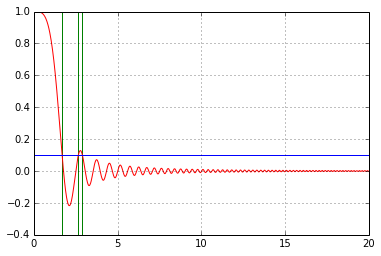

In [13]:
def f(x):
    return math.sin(x**2)/(x**2)

def bisection(l,r):
    m = (l+r)/2
    if (abs(f(m)-0.1)<=10**-4):
        plt.axvline(m,color='green')
        return m
    else:
        if ((f(m)-0.1)*(f(l)-0.1)<0):
            return bisection(l,m)
        else:
            return bisection(m,r)

def allsoln(l,r):
    h = (r-l)/100
    for i in range(100):
        if (((f(l)-0.1)*(f(l+h)-0.1))<0):
            print bisection(l,l+h)
        l+=h
        
allsoln(0.01,5.)

x = np.linspace(0.1,20,1000)
fx = [f(xx) for xx in x]
plt.plot(x,fx, 'r')
plt.axhline(0.1)
plt.grid()

###Problem 3) (100)

3.1) (90 points) Use Newton's method to find intersection of the following two lines.

$$f(x) = x^2 + 1$$

$$g(x) = x^3$$

Any **decent** result from Newton's method will get your full credit. You **must** use Newton's method. No credit will be given to any other method. 

1.46558089357


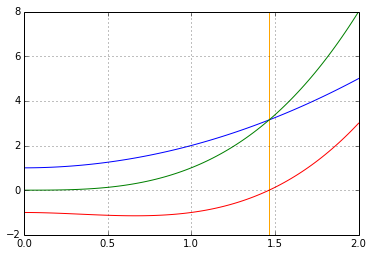

In [36]:
def f(x):
    return x**2 + 1
def g(x):
    return x**3

def i(x):
    return g(x)-f(x)
def d(x):
    return 3*(x**2)-2

def newton(z):
    while (abs(i(z))>=10**-4):
        z = z - (i(z)/d(z))
    plt.axvline(z,color='orange')
    return z

x = np.linspace(0,2,100)
fx = [f(xx) for xx in x]
gx = [g(xx) for xx in x]
ix = [i(xx) for xx in x]

print newton(1.0)

plt.plot(x,fx)
plt.plot(x,gx)
plt.plot(x,ix)
plt.grid()

3.2)(5 Points) Which method converge faster: Newton's Method or bisection?

In [34]:
print "Newton"

Newton


3.3) (5 Points) Does Newton's method guarantee to convege to the real answer?

In [35]:
print "No"

No


### Problem 4)  (100)

4.1)(35 points) Show that

$$f''(x) = \frac{f(x+h) -2f(x) + f(x-h)}{h^2} + O(h^2)$$

In [37]:
print "Look at written"

Look at written


4.2)(35 points) Let
$$f(x) = x^2 \exp(x \cos (x))$$
Plot for $x \in [0,2\pi]$ the following lines

1. $f(x)$
2. $f'(x)$ caculated numerically using central difference method.
3. $f''(x)$ calculated numerically.

Pick appropriate value for $h$. Analytical answers will not be accepted.

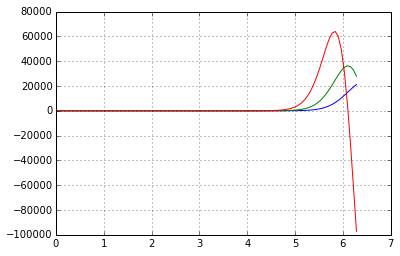

In [46]:
def f(x):
    return (x**2)*math.exp(x*math.cos(x))

def fd(x,h):
    return (f(x+(h/2))-f(x-(h/2)))/h

def fdd(x,h):
    return (f(x+h)-2*f(x)+f(x-h))/(h**2)

x = np.linspace(0,2*math.pi,100)
fx = [f(xx) for xx in x]
fdx = [fd(xx,0.00001) for xx in x]
fddx = [fdd(xx,0.00001) for xx in x]

plt.plot(x,fx)
plt.plot(x,fdx)
plt.plot(x,fddx)
plt.grid()

4.3)(30 points) Plot polynomial of **degree 4** that passes through the following four points.
$$(0.1, 1), (0.2,2), (0.5, 3),  (0,4), (1, 5) $$

Make sure your polynomial is of **degree 4**.

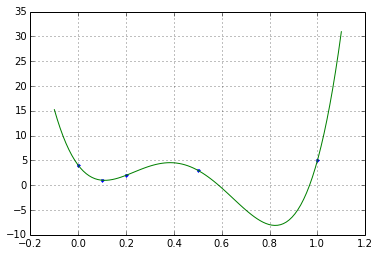

In [50]:
def legendre(z,x,y):
    out = 0
    for i in range(len(x)):
        temp = 1.
        for j in range(len(x)):
            if (i==j):
                continue
            temp *= (z-x[j])/(x[i]-x[j])
        out += y[i]*temp
    return out

x = [0.1,0.2,0.5,0.,1.]
y = [1.,2.,3.,4.,5.]

xs = np.linspace(-0.1,1.1,100)
ys = [legendre(xx,x,y) for xx in xs]
plt.plot(x,y,'.')
plt.plot(xs,ys)
plt.grid()

###Problem 5)  (100)

5.1) (70 points)Use trapezoid rule with 100 subdivision to find the following calculate the following integral.

$$ \int\limits_{x=1}^{x=2} \frac{1}{x^5} \; dx$$

In [53]:
def f(x):
    return 1./(x**5.)

def trap(a,b,n):
    h = (b-a)/n
    sum = (f(a)+f(b))/2.
    for i in range(1,n):
        sum += f(a+(i*h))
    return h*sum

print trap(1.,2.,100)

0.23441601272


5.2) (15 points)What is bound on **truncation error** for your answer in 3.1)

In [54]:
def fdd(x):
    return 30.*(x**-7.)

print ((1./12.)*((2.-1.)**3)*(fdd(1)))/(100**2)

0.00025


5.3) (15 points) How many subdivision do we need to make sure that our answer is at most $10^{-6}$ from the real answer?

In [57]:
def fdd(x):
    return 30.*(x**-7.)

def sub(b):
    n = 1
    error = ((1./12.)*((2.-1.)**3)*(fdd(1)))/(n**2)
    while (abs(error)>b):
        n += 1
        error = ((1./12.)*((2.-1.)**3)*(fdd(1)))/(n**2)
    return n

print sub(10**-6)

1582


###Problem 6) (100)

6.1) (100) Fit these data point with a straight line. Plot the data point along with the fitted line.

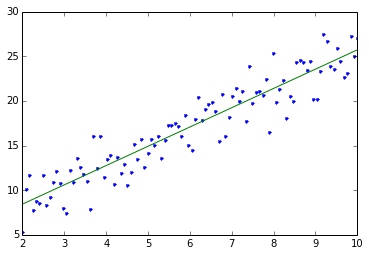

In [69]:
def e(x):
    return np.sum(x)/len(x)

def cov(x,y):
    return (e(x*y)-(e(x)*e(y)))

def var(x):
    return (e(x**2)-(e(x)**2))

np.random.seed(31453)
n = 100
x = np.linspace(2,10,n)
y = 2.2222 * x + 3.3333 + np.random.randn(n)*2

a = cov(x,y)/var(x)
b = e(y) - a*e(x)
ys = [(a*xx)+b for xx in x]
plt.plot(x,y,'.')
plt.plot(x,ys)

###Problem 7) (100)

7) Do the semicircle problem from scratch.

###Problem 8)  (100)

8) Previous Midterm. Problem 6.